In [1]:
import numpy as np
import pandas as pd
import scipy.stats as spt
import seaborn as sb
import matplotlib.pyplot as plt

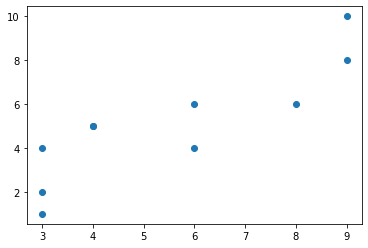

5.61111111111111


In [2]:
x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]
plt.plot(x, y, 'o')
plt.show()
np.cov(x, y)
print(np.cov(x, y)[0,1])

In [3]:
np.corrcoef(x, y)
print(np.corrcoef(x, y)[0,1]) # (먼저) 넘파이에서는 피어슨 상관분석을 한다.

0.8625172792135779


In [4]:
spt.spearmanr(x, y).correlation 

0.9000703207408192

스피어만 분석은 설문조사에서 많이 낸다. 1, 2, 3, 4, 5 등등.

In [5]:
spt.kendalltau(x, y).correlation # corr지우고 하면 뭐 여러가지 나온다고.

0.8153742483272113

In [6]:
spt.pearsonr(x, y)

(0.862517279213578, 0.0013196539142000013)

In [7]:
data1=pd.read_csv('score3.csv')
data1.info()

FileNotFoundError: [Errno 2] No such file or directory: 'score3.csv'

In [ ]:
sb.regplot('score','sp',lowess=True,data=data1) #데이터를 불러와서 레지드 플롯을 그리면 선이 그려지는 것을 확인할 수 있다.

시본에 있는 기본을 그대로 가져와서 플로팅 한건데, 추정회귀계수는 아니고, 정확한 알고리즘은 모르지만 (시본이 분석을 위해서 사용하는 툴은 아니라서)

이걸 통해서 어느정도 경향성은 파악 할 수 있다.

In [ ]:
sb.boxplot('score', data=data1, orient='v') # 산포에 대한 정보를 미리 볼 수 있다.
plt.show()

In [ ]:
sb.boxplot('sp', data=data1, orient='v') # sp 라는 항과의 관계
plt.show()

In [ ]:
sb.kdeplot(data1['score']) # 어디에 자료들이 모여있는지
plt.show()

In [ ]:
sb.kdeplot(data1['sp'])
plt.show()

In [ ]:
print(spt.skew(data1['score']),'\n') # 왜도 체크. 데이터를 계산하기 전에 사전에 해보는 정도!
print(spt.skew(data1['sp']))

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import vif

reg1 = ols('score ~ sp', data=data1).fit() # ANOVA 와 같다. 종속변수~독립변수. 수치값이기 때문에 그대로 적어주시면 된다. 아까는 카테고리를 적었지만.

reg1.summary()

statsmodels의 장점은 테이블이 예쁘게 나온다.

prob을 보니까 유의미 하다고 나왔다.

r-square 값은 다음시간에 더 이야기 할 것인데, 

nonrobust는 안정적이라는 이야기 : obsevation 수가 적어서 나오는 것.

log-likehood는 로지스틱 회귀때 쓸 것.

In [ ]:
reg2 = ols('score ~ 0+sp', data=data1).fit() # 0을 더한건 상수를 고려하지 않는다는 것. 상수를 0으로 놓고 하겠다는 것. 독립변수 하나만 보고 모델링을 하겠다는 것.
reg2.summary()

In [ ]:
mdl = ols('score ~ sp + ef',data=data1) # 다중회귀. 독립변수가 두 개 들어갔으니까. 
reg3 = mdl.fit()
reg3.summary()

In [ ]:
print(mdl.exog_names,'\n') # 두 개가 들어갔기 때문에. # 10정도 되면 문제가 있다고 얘기 한다고 하였다.

print(vif(mdl.exog, 1),'\n')
print(vif(mdl.exog, 2),'\n')

최소한의 변수로 최적의 모델링을 하는 것이 중요하다. 

In [ ]:
pd.DataFrame({'col': column, 'VIF': vif(mdl.exog, i)} 
             for i, column in enumerate(mdl.exog_names)
             if column != 'Intercept')

In [ ]:
ftd = reg1.predict(data1)
res = data1['score'] - ftd

sb.regplot(ftd, res, lowess=True, line_kws={'color': 'green'})
plt.plot([ftd.min(), ftd.max()], [0, 0], '--', color='black')
plt.show()

잔차 평균이 거의 0에 맞게 나온다.

In [ ]:
sr = spt.zscore(res)
(x,y),_ = spt.probplot(sr)

sb.scatterplot(x,y)
plt.plot([-2, 2], [-2, 2], '--', color='black')
plt.show()

print(spt.shapiro(res))

qq 플롯을 그려보았다.

In [ ]:
sb.regplot(ftd, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.show()